## 캐글을 이용한 타이타닉 연습 1 처음에는 같이 타이핑 하면서 따라하기.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings

plt.style.use('seaborn-v0_8') 
sns.set(font_scale=2.5)

warnings.filterwarnings('ignore')


%matplotlib inline

In [4]:
# 파일 가져오기

df_train = pd.read_csv('./titanic (1)/train.csv')
df_test = pd.read_csv('./titanic (1)/test.csv')


In [9]:
# 0 사망
#pclass 첫번째
#이름
# 비어 있으면 기본 값 5개 
# 카테고리는 순서가 없는것

df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
df_train.shape


#총 / 컬럼

(891, 12)

In [10]:
#간단한 통계값을 말해준다.

df_train.describe()

# age에 null 값이 존재한다.

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [14]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [21]:
for col in df_train.columns:
    msg ='column: {0:>10}\t Percent of NaN value: {1:.2f}%'.format(col, 100*(df_train[col].isnull().sum()/df_train[col].shape[0]))
    print(msg)
    
    
    # 벨류값이 널값을 가진다.
    # 널값은 채우는게 좋다.

column: PassengerId	 Percent of NaN value: 0.00%
column:   Survived	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 19.87%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.00%
column:      Cabin	 Percent of NaN value: 77.10%
column:   Embarked	 Percent of NaN value: 0.22%


In [23]:
for col in df_test.columns:
    msg ='column: {0:>10}\t Percent of NaN value: {1:.2f}%'.format(col, 100*(df_train[col].isnull().sum()/df_train[col].shape[0]))
    print(msg)

column: PassengerId	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 19.87%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.00%
column:      Cabin	 Percent of NaN value: 77.10%
column:   Embarked	 Percent of NaN value: 0.22%


<Axes: >

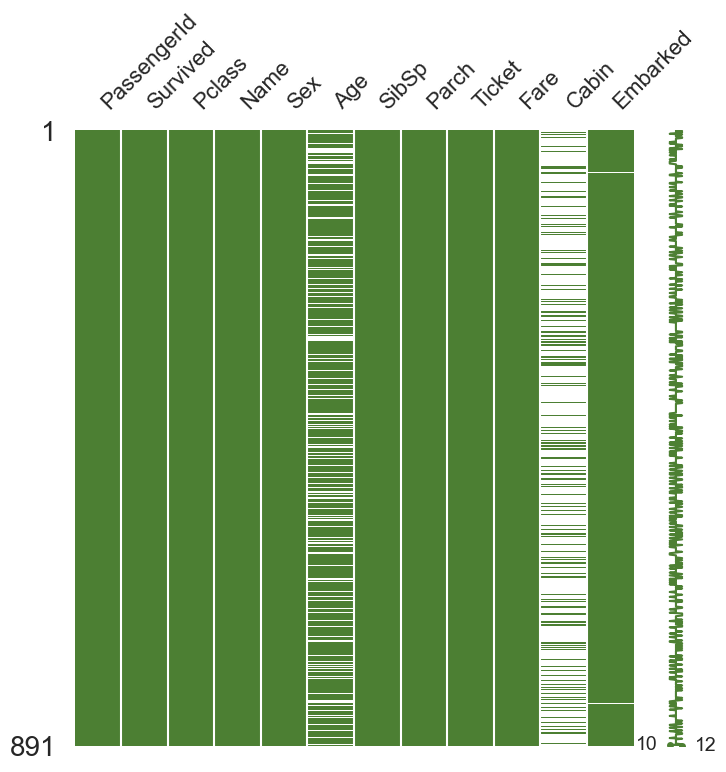

In [27]:
msno.matrix(df =df_train.iloc[:, :], figsize=(8,8), color=(0.3,0.5,0.2))

# color 맨 뒤는 rgb다. 
# 빈칸은 널이다.

<Axes: >

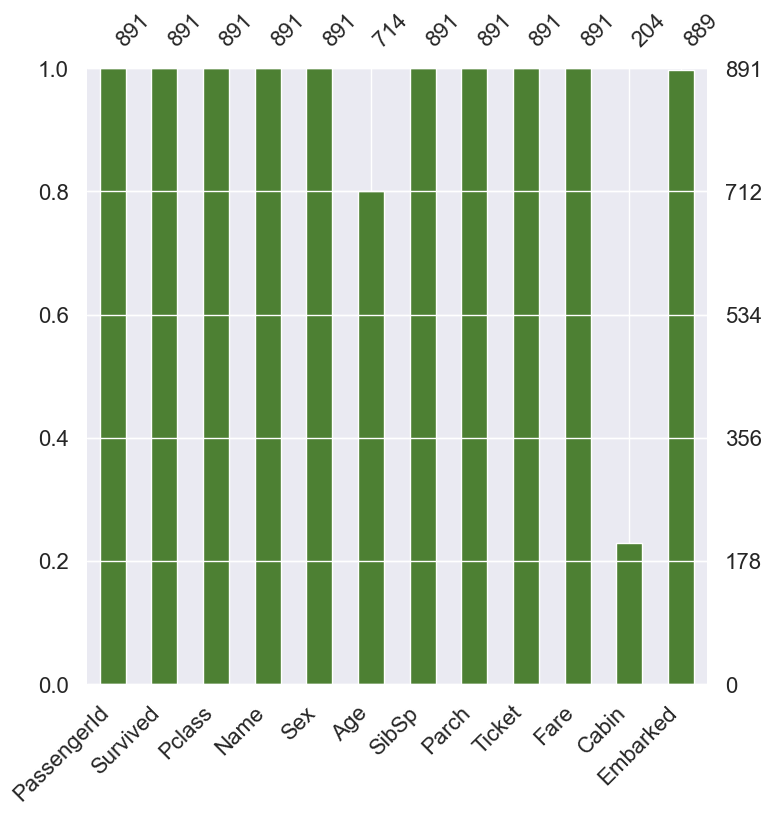

In [29]:
msno.bar(df =df_train.iloc[:, :], figsize=(8,8), color=(0.3,0.5,0.2))

## 캐글을 이용한 타이타닉 연습 2 처음에는 같이 타이핑 하면서 따라하기. 동영상(2)

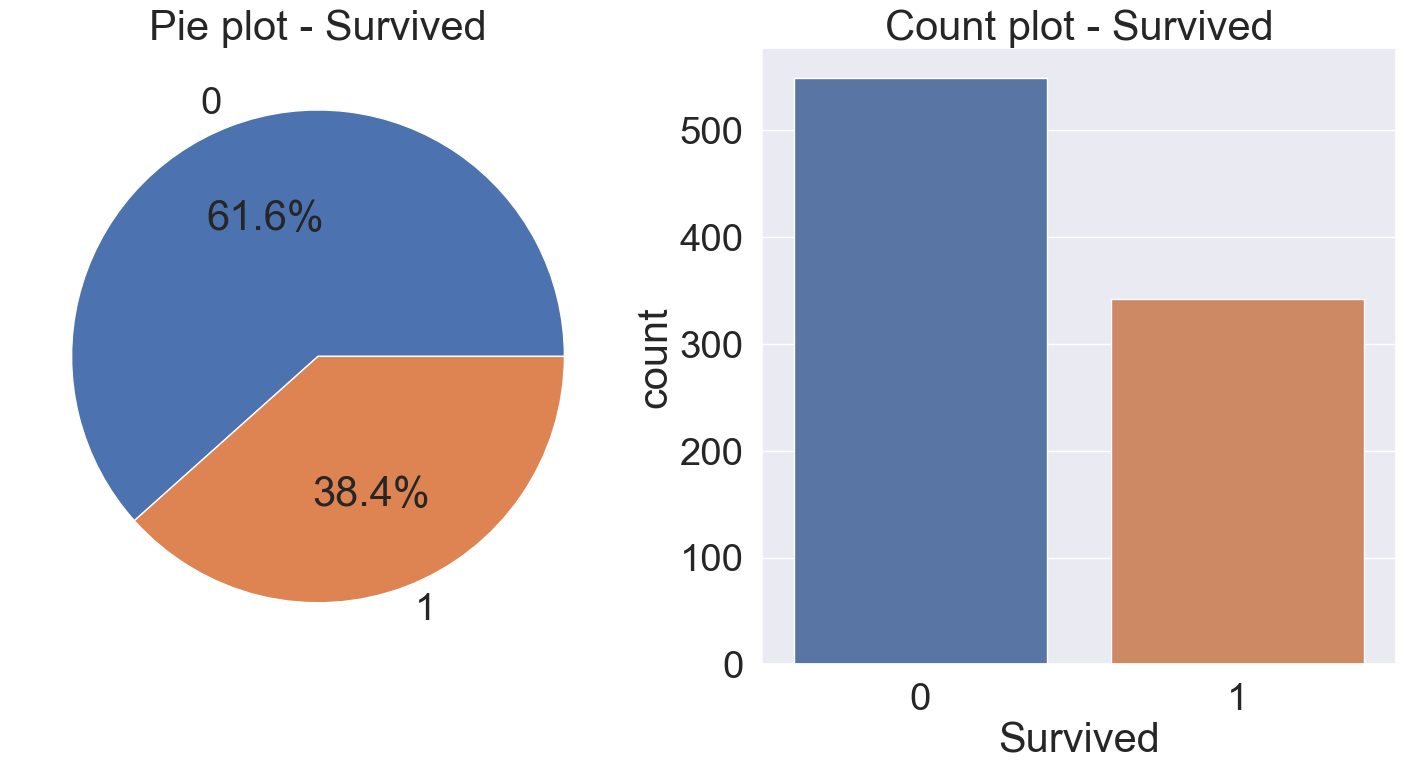

In [40]:
fig, ax = plt.subplots(1, 2, figsize=(18, 8)) # 하나의 행에 두개를 하겠다. 그리고 사이즈.

#시리즈는 플랏을 들고 있다.
df_train['Survived'].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[0])
ax[0].set_title('Pie plot - Survived') # 원
ax[0].set_ylabel('')
sns.countplot(x='Survived', data=df_train, ax=ax[1]) # 막대
ax[1].set_title('Count plot - Survived') 
plt.show()

In [45]:
df_train[['Pclass','Survived']].groupby(['Pclass'], as_index=True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [46]:
df_train[['Pclass','Survived']].groupby(['Pclass'], as_index=True).sum()

,Survived
Pclass,
1,136
2,87
3,119


# %pip install Jinja2   가 필요하다.

In [51]:
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

# 생존률을 구하는 값.
## 80(80+136)≈0.63

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


<Axes: xlabel='Pclass'>

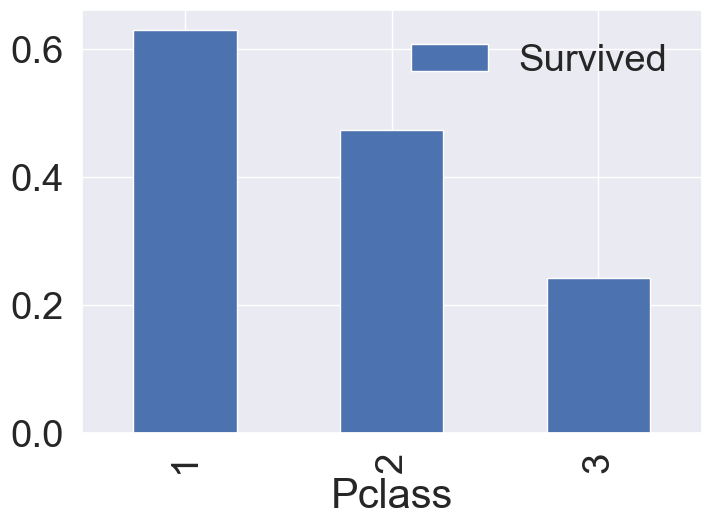

In [53]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar()
#ascending = flse 내림차순

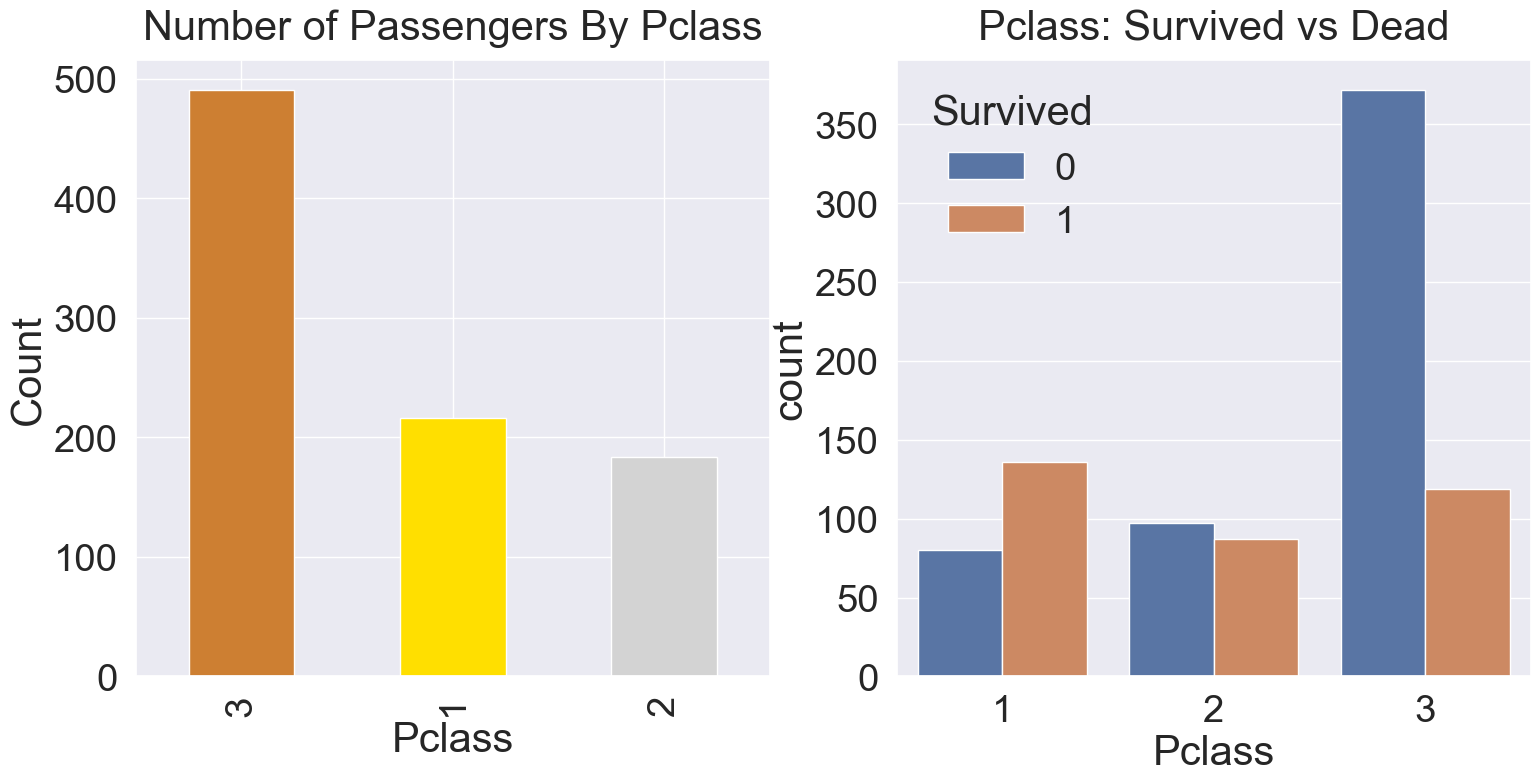

In [56]:
y_position =1.02

f, ax = plt.subplots(1,2, figsize =(18,8))
df_train['Pclass'].value_counts().plot.bar(color=['#CD7F32', '#FFDF00', '#D3D3D3'], ax=ax[0])
ax[0].set_title('Number of Passengers By Pclass', y=y_position)
ax[0].set_ylabel('Count')
sns.countplot(x='Pclass', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead', y=y_position)
plt.show()


## 성별 별 생존률

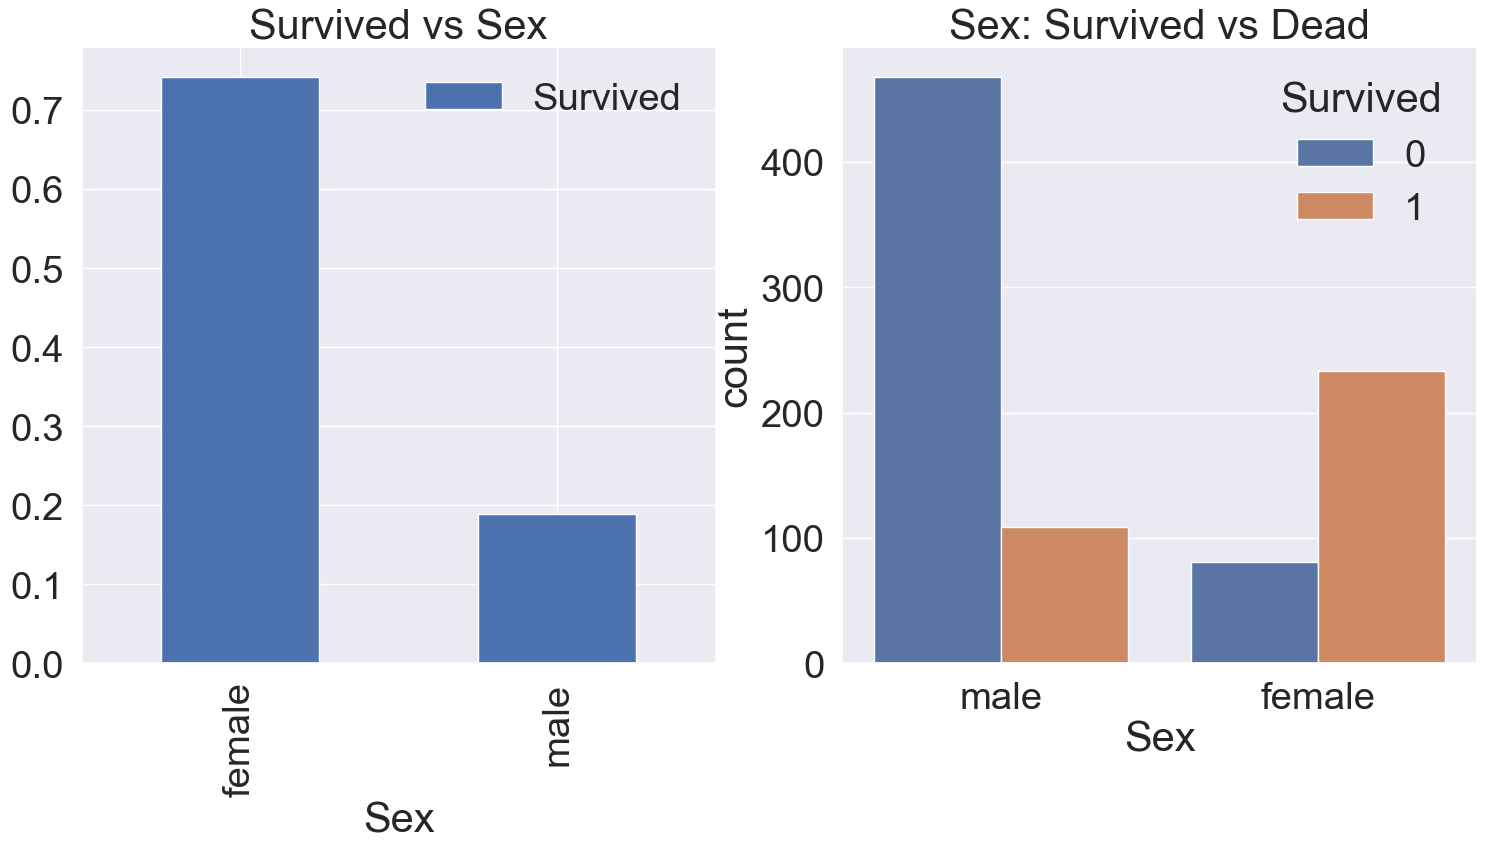

In [58]:
f, ax = plt.subplots(1,2, figsize=(18,8))

df_train[['Sex', 'Survived']].groupby(['Sex'],as_index= True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot(x='Sex', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')
plt.show()

In [60]:
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [62]:
pd.crosstab(df_train['Sex'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


In [64]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=df_train, 
               size=6, aspect=1.5)

AttributeError: module 'seaborn' has no attribute 'factorplot'

## factorplot 이제 사용하지 않음

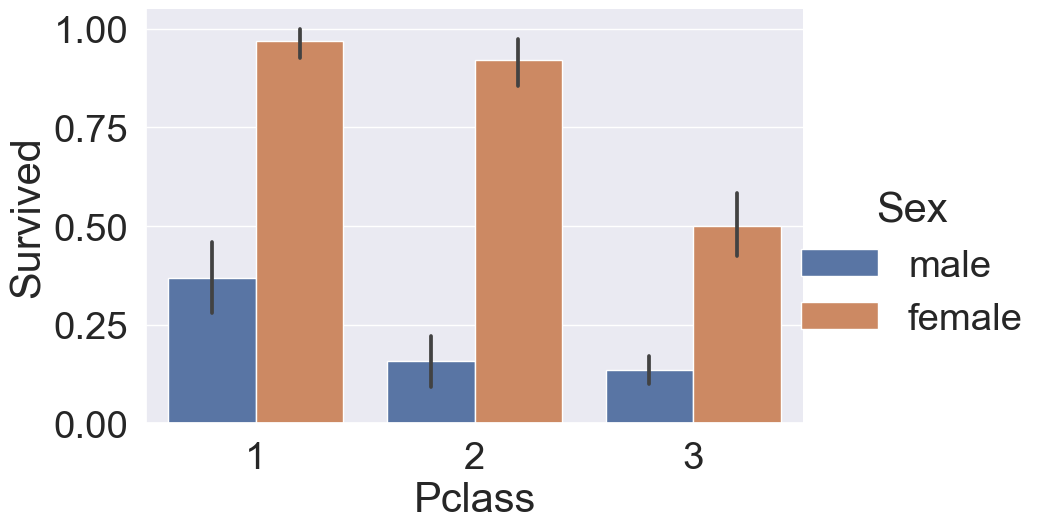

In [73]:
sns.catplot(x='Pclass', y='Survived', hue='Sex', data=df_train, kind='bar', height=6, aspect=1.5)

# 나이별 생존률

In [76]:
print('제일 나이 많은 탑승객 : {:.1f} Years'.format(df_train['Age'].max()))
print('제일 어린 탑승객 : {:.1f} Years'.format(df_train['Age'].min()))
print('탑승객 평균 나이 : {:.1f} Years'.format(df_train['Age'].mean()))

제일 나이 많은 탑승객 : 80.0 Years
제일 어린 탑승객 : 0.4 Years
탑승객 평균 나이 : 29.7 Years


#### kdeplot 히스토그램?? ( 이거 잘 모르겠음 검색 필요)
##### 막대그래프로 하면 너무 딱딱하기 때문에 이렇게 사용도 한다.

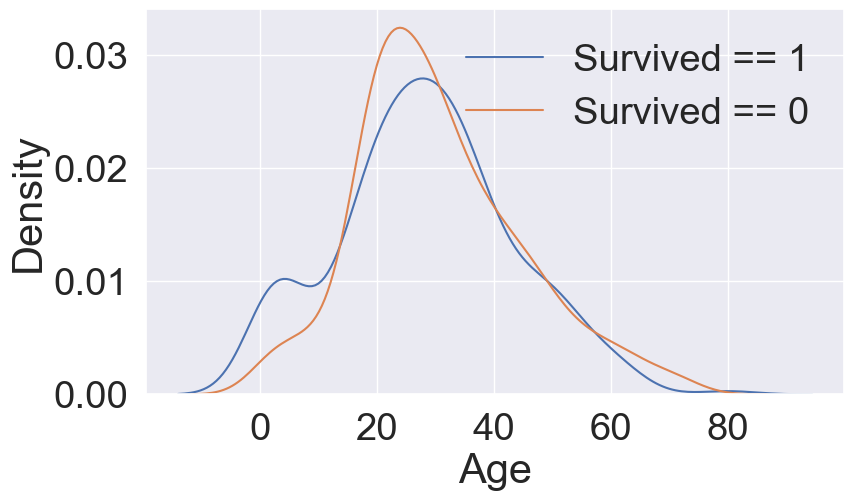

In [77]:
fig, ax = plt.subplots(1, 1, figsize=(9, 5))
sns.kdeplot(df_train[df_train['Survived'] == 1]['Age'], ax=ax)
sns.kdeplot(df_train[df_train['Survived'] == 0]['Age'], ax=ax)
plt.legend(['Survived == 1', 'Survived == 0'])
plt.show()

<Axes: >

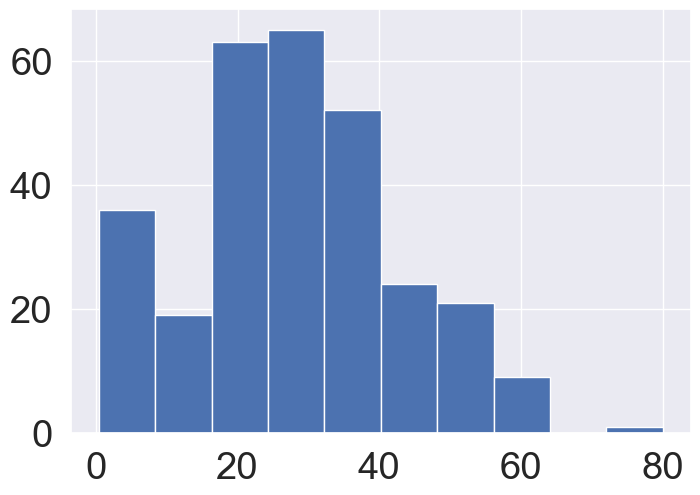

In [78]:
df_train[df_train['Survived']==1]['Age'].hist()

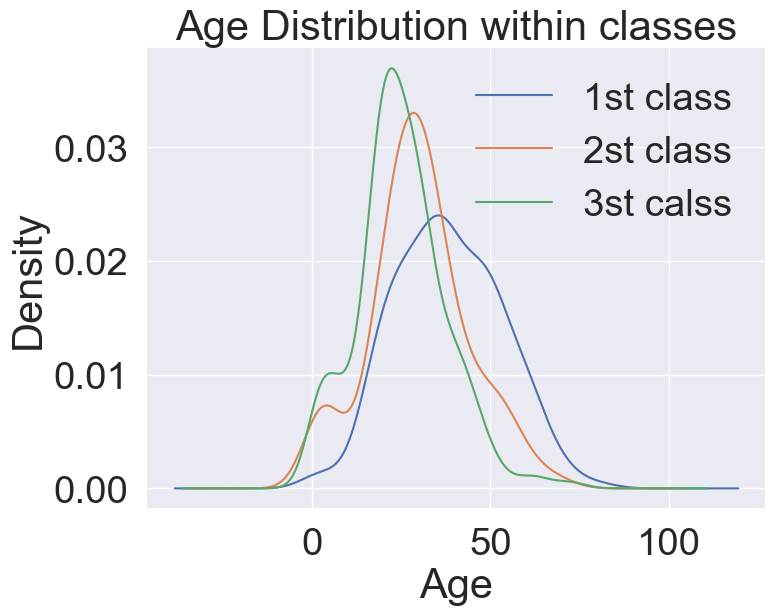

In [79]:
plt.figure(figsize=(8, 6))
df_train['Age'][df_train['Pclass'] == 1].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 2].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 3].plot(kind='kde')

plt.xlabel('Age')
plt.title('Age Distribution within classes')
plt.legend(['1st class' , '2st class','3st calss'])

####  위 코드 설명 10 살 아래의 사람중에 살아 남은 사람의 수

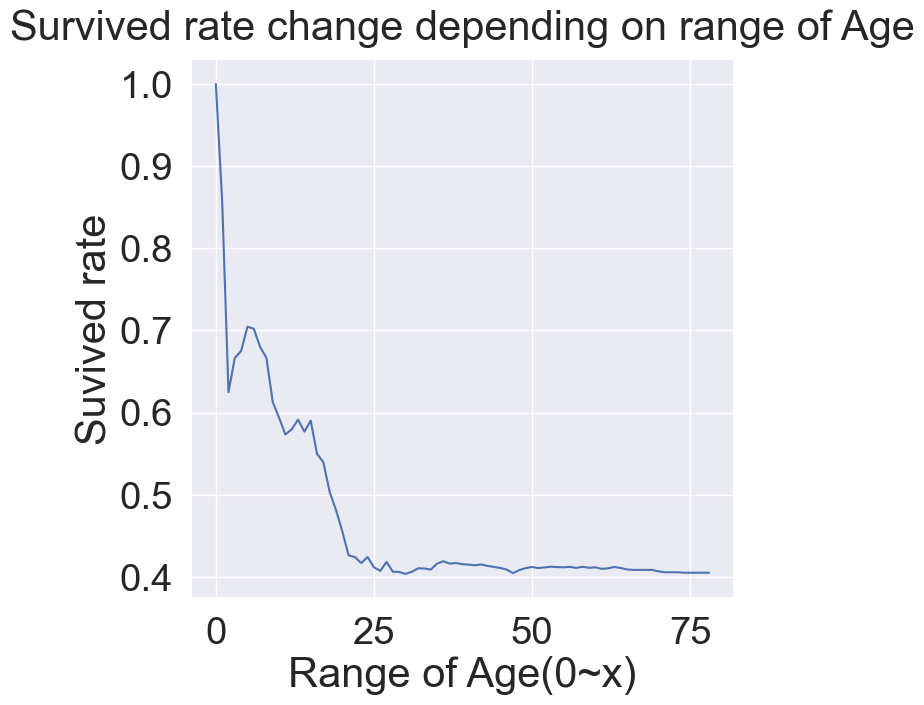

In [83]:
cummulate_survival_ratio = []
for i in range(1, 80):
    cummulate_survival_ratio.append(df_train[df_train['Age'] < i]['Survived'].sum() / len(df_train[df_train['Age'] < i]['Survived']))
    
plt.figure(figsize=(7,7))
plt.plot(cummulate_survival_ratio)
plt.title('Survived rate change depending on range of Age', y =1.02) 
plt.ylabel('Suvived rate')
plt.xlabel('Range of Age(0~x)')
plt.show()   

In [81]:
i =10

df_train[df_train['Age'] < i]['Survived'].sum()

38

#### 오류 수정 완 (아예 안뜨는 오류 수정 완)
##### 표가 하나씩 뜸. 1행 2열로 했는데... figsize 문제 없음...

###### kind 가 바꼈으므로 kind의 문제로 생각 가능 아직 kind 종류를 알지 못함으로 1회 필사는 넘어 가는 걸로

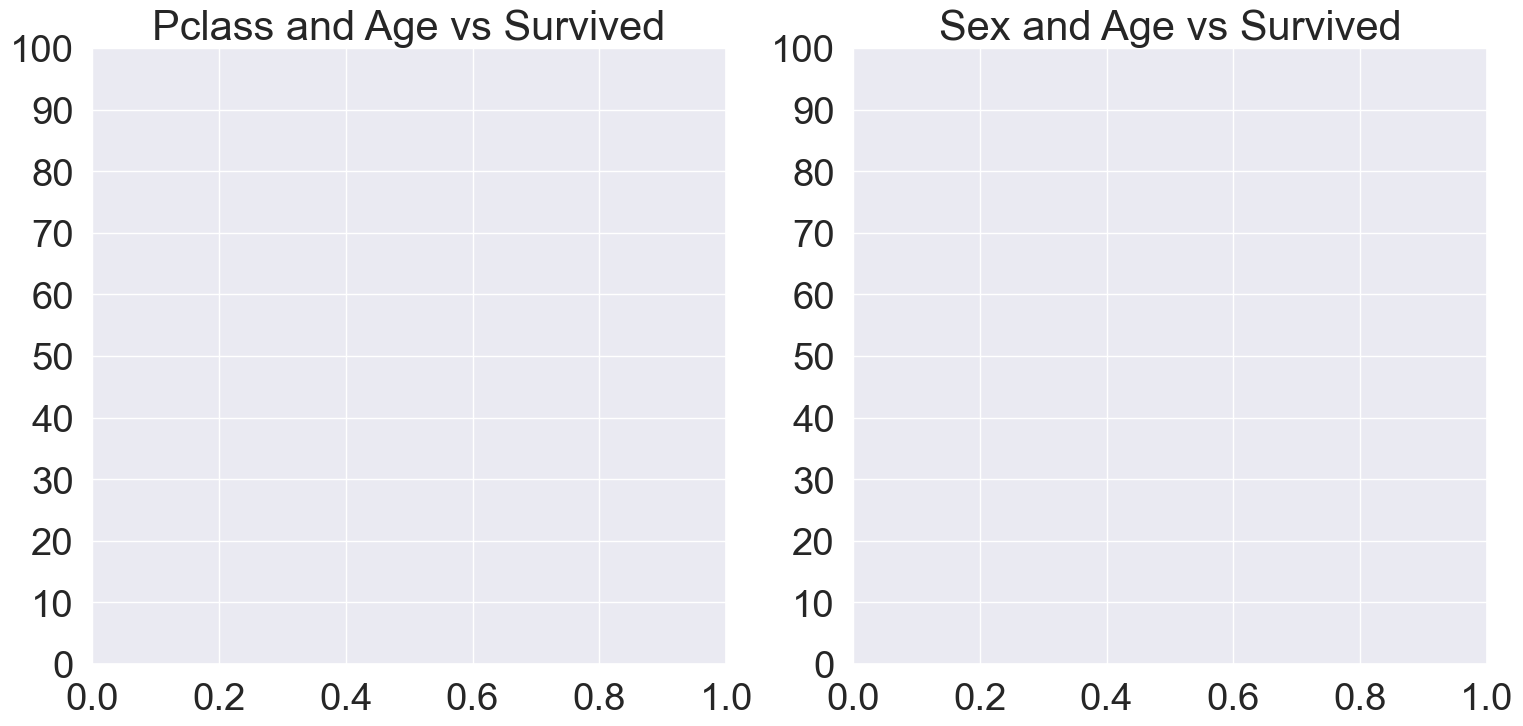

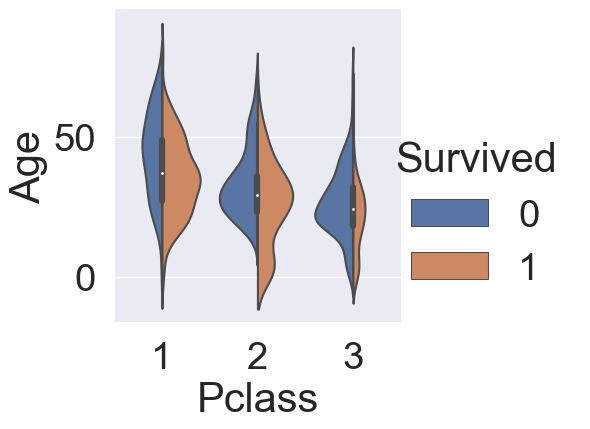

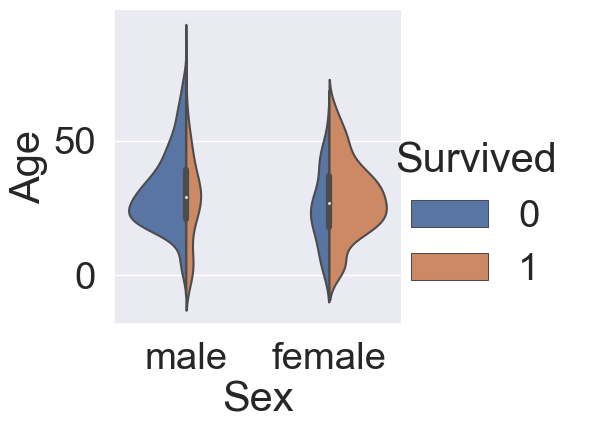

In [98]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
sns.catplot(x="Pclass", y="Age", hue="Survived", data=df_train, kind="violin", scale='count', split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0, 110, 10))
sns.catplot(x="Sex", y="Age", hue="Survived", data=df_train, kind="violin", scale='count', split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0, 110, 10))
plt.show()


<Axes: xlabel='Embarked'>

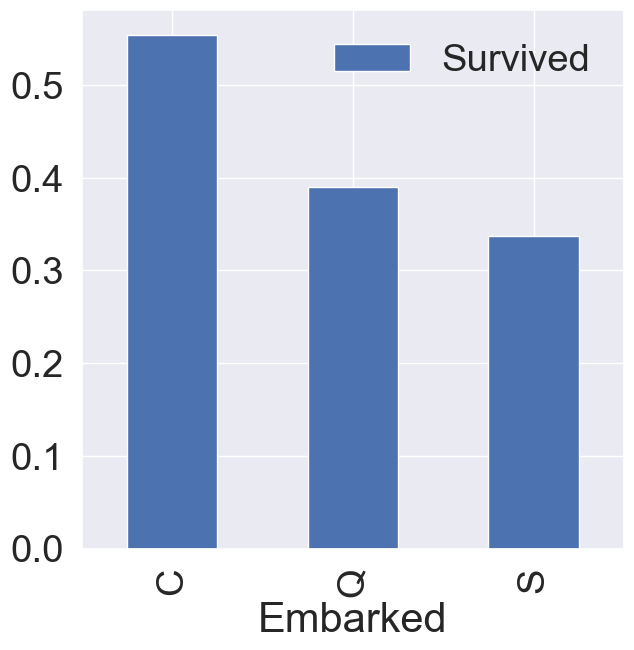

In [100]:
f, ax = plt.subplots(1, 1, figsize=(7, 7))
df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax)


In [101]:
df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=True).mean().sort_values(by='Survived')

,Survived
Embarked,
S,0.336957
Q,0.389610
C,0.553571


### sort_index() 도 있다.

In [103]:
df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=True).mean().sort_index()

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


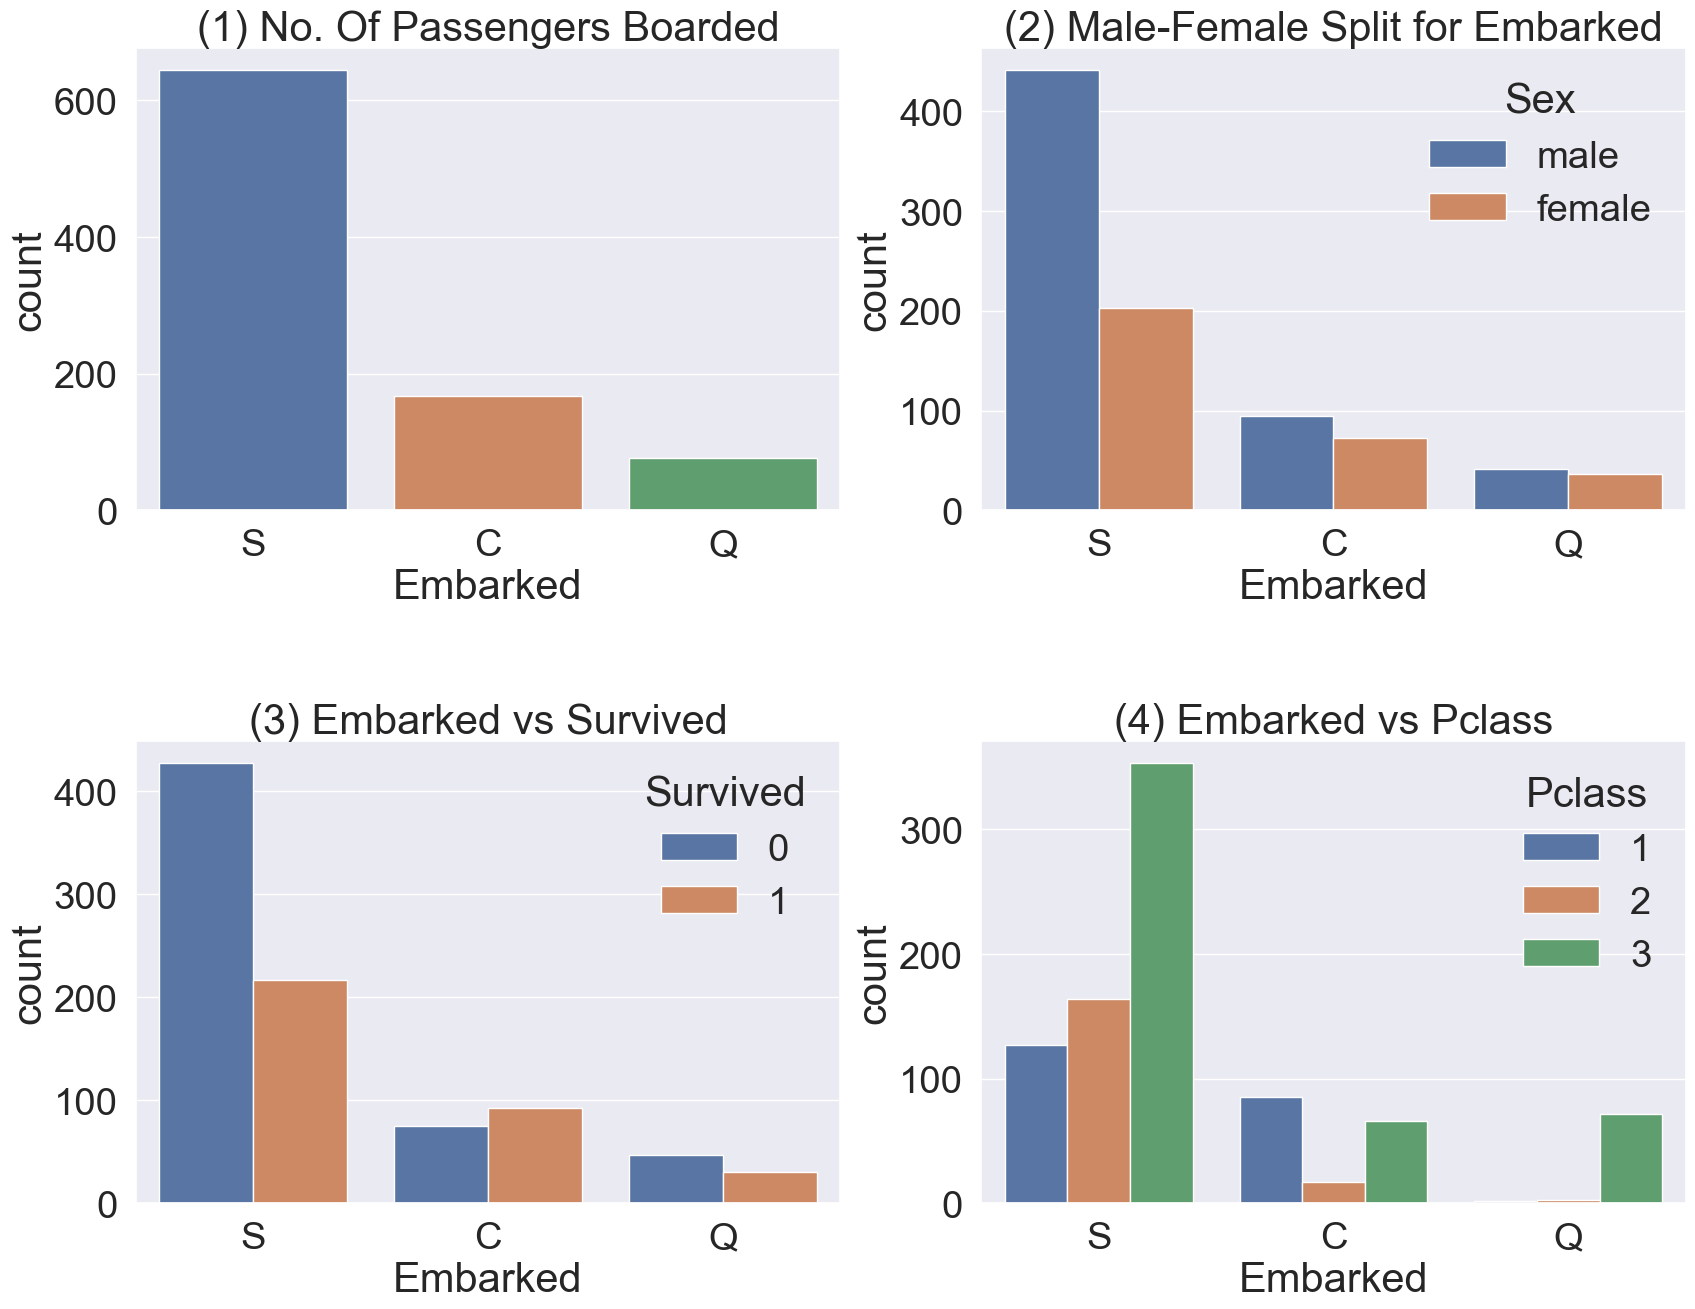

In [107]:
f, ax = plt.subplots(2, 2, figsize=(20, 15))

sns.countplot(x='Embarked', data=df_train, ax=ax[0, 0])
ax[0, 0].set_title('(1) No. Of Passengers Boarded')

sns.countplot(x='Embarked', hue='Sex', data=df_train, ax=ax[0, 1])
ax[0, 1].set_title('(2) Male-Female Split for Embarked')

sns.countplot(x='Embarked', hue='Survived', data=df_train, ax=ax[1, 0])
ax[1, 0].set_title('(3) Embarked vs Survived')

sns.countplot(x='Embarked', hue='Pclass', data=df_train, ax=ax[1, 1])
ax[1, 1].set_title('(4) Embarked vs Pclass')

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()



#### 아래 오류 코드

##### x값을 표기 해줘야 한다.

TypeError: countplot() got multiple values for argument 'data'

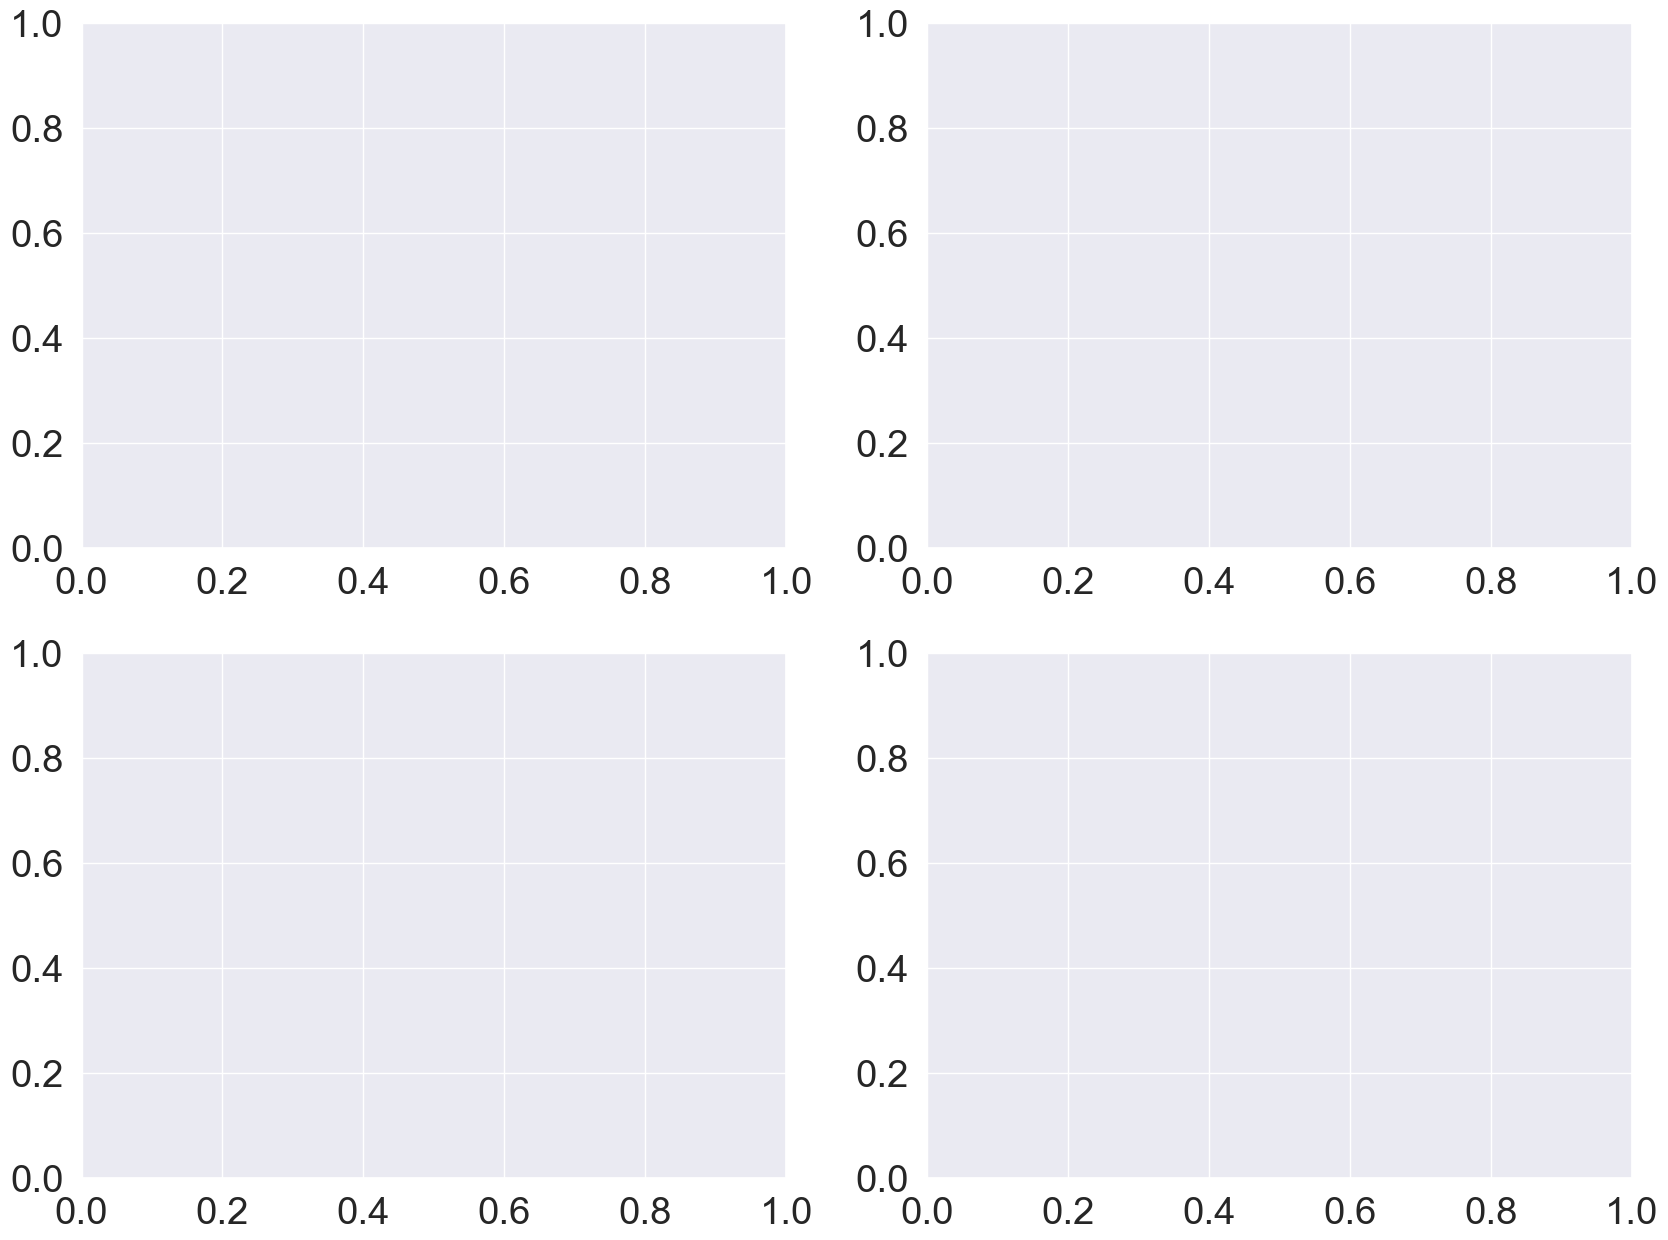

In [108]:
f,ax=plt.subplots(2, 2, figsize=(20,15))
sns.countplot('Embarked', data=df_train, ax=ax[0,0])
ax[0,0].set_title('(1) No. Of Passengers Boarded')
sns.countplot('Embarked', hue='Sex', data=df_train, ax=ax[0,1])
ax[0,1].set_title('(2) Male-Female Split for Embarked')
sns.countplot('Embarked', hue='Survived', data=df_train, ax=ax[1,0])
ax[1,0].set_title('(3) Embarked vs Survived')
sns.countplot('Embarked', hue='Pclass', data=df_train, ax=ax[1,1])
ax[1,1].set_title('(4) Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

##### 시리즈 끼리는 + - 가 가능하다. (연산이 가능하다.)

In [109]:
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch']+1
# 자신을 포함해야하니 1을 더합니다

df_test['FamilySize'] = df_test['SibSp']+df_test['Parch']+1


In [110]:
print("Maximum size of Family:",df_train['FamilySize'].max())
print("Minimum size of Family:",df_train['FamilySize'].min())

Maximum size of Family: 11
Minimum size of Family: 1


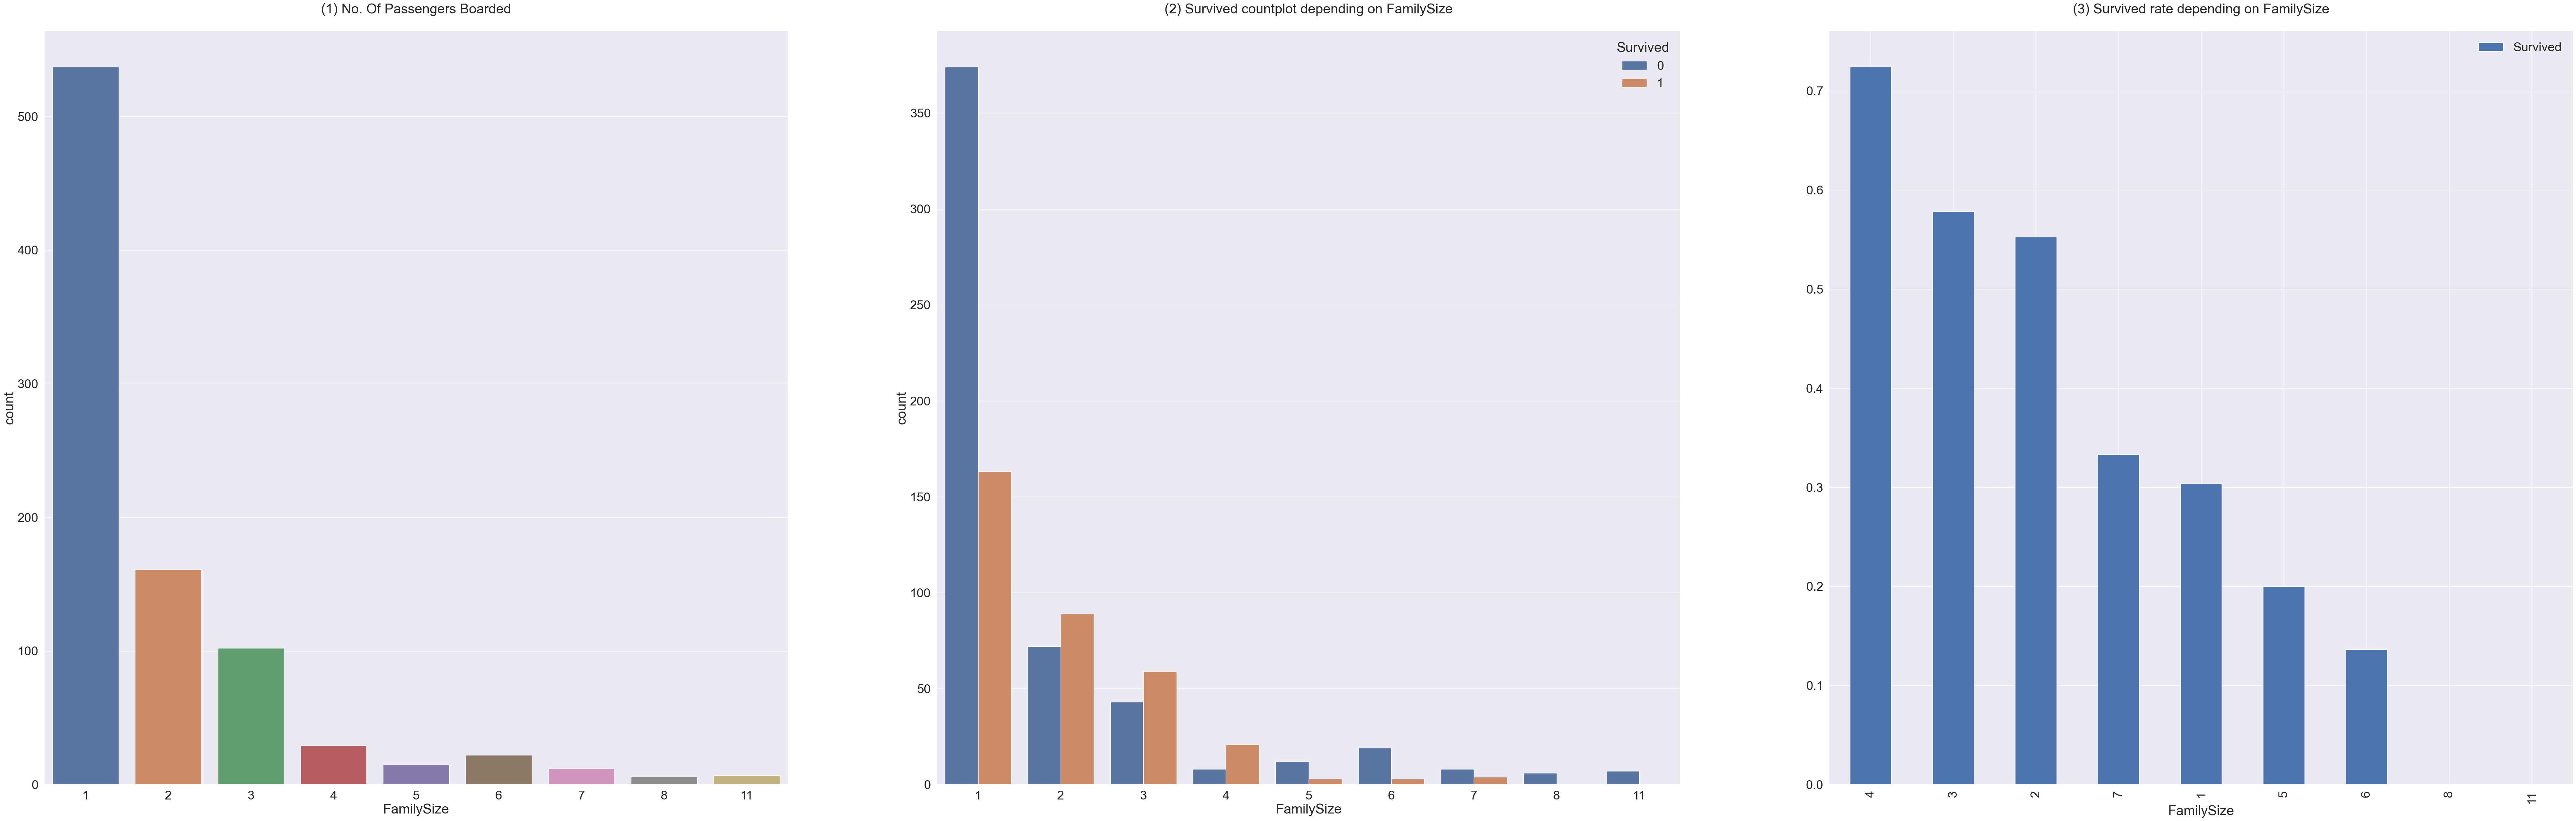

In [115]:
f,ax=plt.subplots(1, 3, figsize=(100,30))
sns.countplot(x='FamilySize', data=df_train, ax=ax[0])
ax[0].set_title('(1) No. Of Passengers Boarded', y=1.02)

sns.countplot(x='FamilySize', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('(2) Survived countplot depending on FamilySize',  y=1.02)

df_train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax[2])
ax[2].set_title('(3) Survived rate depending on FamilySize',  y=1.02)

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()                                                                               